In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [2]:
from scipy.spatial.distance import euclidean

## Calculate the diameters of all clusters

In [134]:
def diameters(df, number_of_clusters):
    n_clusters = np.arange(0, number_of_clusters)
    diameters = []
    #for each cluster
    for c in n_clusters:
        distances = []
        cluster = df.loc[df['labels'] == c]
        cluster.drop('labels', axis=1, inplace=True)
        #calculates distance between all points in  the cluster
        for i in range(len(cluster)):
            for j in range(i+1, len(cluster)):
                distances.append(euclidean(cluster.iloc[i,:], cluster.iloc[j,:]))
        #appends the maximum distance between two points in the cluster,
        #i.e., its diameter, to the list of diameters of all clusters
        diameters.append(max(distances))
    
    return diameters

In [157]:
def midpoints(df, number_of_clusters):
    n_clusters = np.arange(0, number_of_clusters)
    midpoints = []
    
    for c in n_clusters:
        cluster = df.loc[df['labels'] == c]
        cluster.drop('labels', axis=1, inplace=True)
        midpoint = []
        for i in range(len(cluster.columns)):
            midpoint.append(np.mean(cluster.iloc[:,i]))
        midpoints.append(midpoint)
    
    return midpoints

In [167]:
centroids = midpoints(df, 4)
for i in range(4):
    for j in range(4):
        print("cluster " + str(i) +" com o Cluster " + str(j) )
        print(euclidean(centroids[i], centroids[j]))
        print( " ")

cluster 0 com o Cluster 0
0.0
 
cluster 0 com o Cluster 1
12.816925429487364
 
cluster 0 com o Cluster 2
6.080290019977491
 
cluster 0 com o Cluster 3
7.062221896449644
 
cluster 1 com o Cluster 0
12.816925429487364
 
cluster 1 com o Cluster 1
0.0
 
cluster 1 com o Cluster 2
18.79445805789005
 
cluster 1 com o Cluster 3
15.405046794116886
 
cluster 2 com o Cluster 0
6.080290019977491
 
cluster 2 com o Cluster 1
18.79445805789005
 
cluster 2 com o Cluster 2
0.0
 
cluster 2 com o Cluster 3
7.566888608341238
 
cluster 3 com o Cluster 0
7.062221896449644
 
cluster 3 com o Cluster 1
15.405046794116886
 
cluster 3 com o Cluster 2
7.566888608341238
 
cluster 3 com o Cluster 3
0.0
 


C:\Users\Luan Brasil\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


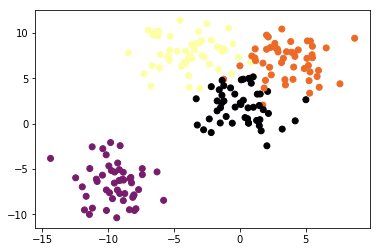

In [168]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='inferno')

plt.show()

In [5]:
#calculate distances between cluster midpoints
def min_dist_interpoints(points, n_points):
    distances = list()
    for i in range(n_points):
        if i < n_points-1:
            distances.append(euclidean(points[i], points[i+1]))
        else:
            distances.append(euclidean(points[0], points[i]))
    return min(distances)

In [6]:
#ideia: calcular os pontos médios de cada cluster e, então, a distância entre eles
'''def min_intercluster_distance(data, n_clusters):
    midpoints = list()
    clusters = list(np.arange(1, n_clusters+1))
    for i in range(n_clusters):
        cluster = data.loc[data['labels'] == clusters[i]]
        for k in range(len(cluster)):
            cluster_features = list()
            cluster_features.append(cluster.drop('labels', axis=1).iloc[k,:])
        midpoint_features = list()
        for j in range(len(cluster.drop('labels', axis=1).columns)):
            midpoint_features.append(cluster.drop('labels', axis=1).iloc[:,j].mean())
        #midpoint_features = pd.Series(midpoint_features)
        midpoints.append(midpoint_features)
    return min_dist_interpoints(midpoints, n_clusters)'''

"def min_intercluster_distance(data, n_clusters):\n    midpoints = list()\n    clusters = list(np.arange(1, n_clusters+1))\n    for i in range(n_clusters):\n        cluster = data.loc[data['labels'] == clusters[i]]\n        for k in range(len(cluster)):\n            cluster_features = list()\n            cluster_features.append(cluster.drop('labels', axis=1).iloc[k,:])\n        midpoint_features = list()\n        for j in range(len(cluster.drop('labels', axis=1).columns)):\n            midpoint_features.append(cluster.drop('labels', axis=1).iloc[:,j].mean())\n        #midpoint_features = pd.Series(midpoint_features)\n        midpoints.append(midpoint_features)\n    return min_dist_interpoints(midpoints, n_clusters)"

In [7]:
def min_intercluster_distance(n_clusters, centers):
    return min_dist_interpoints(centers, n_clusters)

### Calculate general Dunn index

In [132]:
def dunn_index(data, number_of_clusters, centers):
    dunn_index = min_intercluster_distance(n_clusters, centers)/max(diameters(df, number_of_clusters))
    return dunn_index

### A partir daqui: código da internet

In [10]:
from sklearn.datasets import make_blobs

In [11]:
data = make_blobs(n_samples=200, n_features=2, 
                           centers=4, cluster_std=1.8,random_state=101)

In [12]:
df = pd.DataFrame(data[0])

In [13]:
df['labels'] = data[1]

In [17]:
def normalize_to_smallest_integers(labels):
    """Normalizes a list of integers so that each number is reduced to the minimum possible integer, maintaining the order of elements.

    :param labels: the list to be normalized
    :returns: a numpy.array with the values normalized as the minimum integers between 0 and the maximum possible value.
    """

    max_v = len(set(labels)) if -1 not in labels else len(set(labels)) - 1
    sorted_labels = np.sort(np.unique(labels))
    unique_labels = range(max_v)
    new_c = np.zeros(len(labels), dtype=np.int32)

    for i, clust in enumerate(sorted_labels):
        new_c[labels == clust] = unique_labels[i]

    return new_c

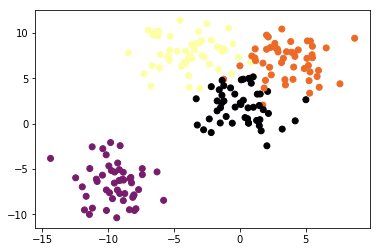

In [20]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='inferno')

plt.show()

In [22]:
def min_cluster_distances(labels, distances):
    """Calculates the distances between the two nearest points of each cluster.

    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    """
    labels = normalize_to_smallest_integers(labels)
    n_unique_labels = len(np.unique(labels))

    min_distances = np.zeros((n_unique_labels, n_unique_labels))
    for i in np.arange(0, len(labels) - 1):
        for ii in np.arange(i + 1, len(labels)):
            if labels[i] != labels[ii] and distances[i, ii] > min_distances[labels[i], labels[ii]]:
                min_distances[labels[i], labels[ii]] = min_distances[labels[ii], labels[i]] = distances[i, ii]
    return min_distances


In [169]:
min_cluster_distances(data[1],euclidean_distances(data[0]))

array([[ 0.        , 20.73531654, 15.30148564, 15.60449397],
       [20.73531654,  0.        , 27.97016696, 23.0914074 ],
       [15.30148564, 27.97016696,  0.        , 17.24893909],
       [15.60449397, 23.0914074 , 17.24893909,  0.        ]])